In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_dir = "/home/rmorey/Desktop/biom262_SingleCell/results/"

In [3]:
filtered_counts = pd.read_csv(data_dir+"counts_filtered.csv", index_col=0)
print(filtered_counts.shape)
filtered_counts.head()

(11973, 952)


,HE24W_EVT_sc1,HE24W_EVT_sc10,HE24W_EVT_sc100,HE24W_EVT_sc101,HE24W_EVT_sc102,HE24W_EVT_sc103,HE24W_EVT_sc104,HE24W_EVT_sc105,HE24W_EVT_sc106,HE24W_EVT_sc107,...,HE8W_STB_sc59,HE8W_STB_sc6,HE8W_STB_sc60,HE8W_STB_sc61,HE8W_STB_sc62,HE8W_STB_sc63,HE8W_STB_sc64,HE8W_STB_sc7,HE8W_STB_sc8,HE8W_STB_sc9
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,1.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.82,...,0.00,0.00,0.00,1.28,0.0,0.00,1.5,0.00,0.00,1.82
A4GALT,32.62,22.24,0.00,25.89,28.46,25.33,9.41,31.10,28.20,34.35,...,0.00,3.23,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.61
AAAS,29.90,25.21,0.00,36.98,18.97,39.31,21.51,34.99,26.44,25.45,...,0.00,8.62,0.00,1.28,0.0,0.00,12.0,4.66,22.30,12.71
AACS,24.46,57.83,100.71,48.08,14.23,37.56,10.76,19.44,42.30,20.36,...,20.61,7.54,2.87,2.55,0.0,11.57,0.0,7.77,6.86,0.61
AADACL2-AS1,0.00,1.48,0.00,2.47,0.00,0.87,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,1.5,0.00,0.00,1.82


**First we will scale the counts for sequencing depth**

Do we need a length normalization here? Why or why not? 

Scaling for sequencing depth: Divide each count by the total reads in that libary and multiply by some scaling factor (so we aren't dealing with tiny tiny numbers). In this case, we will use 10000 as the scaling factor. 

In [4]:
#Use sum to get the total sequencing depth per cell

filtered_counts.sum().head()

HE24W_EVT_sc1      997880.60
HE24W_EVT_sc10     997807.26
HE24W_EVT_sc100    997642.93
HE24W_EVT_sc101    998302.17
HE24W_EVT_sc102    998409.26
dtype: float64

In [5]:
((filtered_counts/filtered_counts.sum())*10000).head()

,HE24W_EVT_sc1,HE24W_EVT_sc10,HE24W_EVT_sc100,HE24W_EVT_sc101,HE24W_EVT_sc102,HE24W_EVT_sc103,HE24W_EVT_sc104,HE24W_EVT_sc105,HE24W_EVT_sc106,HE24W_EVT_sc107,...,HE8W_STB_sc59,HE8W_STB_sc6,HE8W_STB_sc60,HE8W_STB_sc61,HE8W_STB_sc62,HE8W_STB_sc63,HE8W_STB_sc64,HE8W_STB_sc7,HE8W_STB_sc8,HE8W_STB_sc9
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.013629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038242,...,0.000000,0.000000,0.000000,0.012844,0.0,0.000000,0.015099,0.000000,0.000000,0.018301
A4GALT,0.326893,0.222889,0.000000,0.259340,0.285053,0.253800,0.094494,0.311316,0.282383,0.343877,...,0.000000,0.032414,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006134
AAAS,0.299635,0.252654,0.000000,0.370429,0.190002,0.393875,0.216000,0.350255,0.264759,0.254779,...,0.000000,0.086505,0.000000,0.012844,0.0,0.000000,0.120795,0.046734,0.224056,0.127809
AACS,0.245120,0.579571,1.009479,0.481618,0.142527,0.376341,0.108050,0.194597,0.423574,0.203824,...,0.206348,0.075667,0.028771,0.025588,0.0,0.116008,0.000000,0.077923,0.068925,0.006134
AADACL2-AS1,0.000000,0.014833,0.000000,0.024742,0.000000,0.008717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.015099,0.000000,0.000000,0.018301


In [6]:
#Save this output to a new dataframe that we will call scaled_counts
scaled_counts = (filtered_counts/filtered_counts.sum())*10000

#Do we have the number of rows and column that are expected?? 
#Always look at the shape and head when you make a new dataframe.
print(scaled_counts.shape)
scaled_counts.head()

(11973, 952)


,HE24W_EVT_sc1,HE24W_EVT_sc10,HE24W_EVT_sc100,HE24W_EVT_sc101,HE24W_EVT_sc102,HE24W_EVT_sc103,HE24W_EVT_sc104,HE24W_EVT_sc105,HE24W_EVT_sc106,HE24W_EVT_sc107,...,HE8W_STB_sc59,HE8W_STB_sc6,HE8W_STB_sc60,HE8W_STB_sc61,HE8W_STB_sc62,HE8W_STB_sc63,HE8W_STB_sc64,HE8W_STB_sc7,HE8W_STB_sc8,HE8W_STB_sc9
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.013629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038242,...,0.000000,0.000000,0.000000,0.012844,0.0,0.000000,0.015099,0.000000,0.000000,0.018301
A4GALT,0.326893,0.222889,0.000000,0.259340,0.285053,0.253800,0.094494,0.311316,0.282383,0.343877,...,0.000000,0.032414,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006134
AAAS,0.299635,0.252654,0.000000,0.370429,0.190002,0.393875,0.216000,0.350255,0.264759,0.254779,...,0.000000,0.086505,0.000000,0.012844,0.0,0.000000,0.120795,0.046734,0.224056,0.127809
AACS,0.245120,0.579571,1.009479,0.481618,0.142527,0.376341,0.108050,0.194597,0.423574,0.203824,...,0.206348,0.075667,0.028771,0.025588,0.0,0.116008,0.000000,0.077923,0.068925,0.006134
AADACL2-AS1,0.000000,0.014833,0.000000,0.024742,0.000000,0.008717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.015099,0.000000,0.000000,0.018301


The sum of all the values in all the columns should now be the same. Are they? 

In [7]:
scaled_counts.sum().head()

HE24W_EVT_sc1      10000.0
HE24W_EVT_sc10     10000.0
HE24W_EVT_sc100    10000.0
HE24W_EVT_sc101    10000.0
HE24W_EVT_sc102    10000.0
dtype: float64

**Select only variable genes for analysis**

Variation in gene expression is correlated with mean expression level of a gene. We are going to calculate the squared coefficient of variation and compare that the mean expression level in log space. To select genes that are varying in this dataset, we will pick the genes that fall off the linear regression line. See more details [here](https://www.nature.com/articles/nmeth.2645).

.var is a numpy function that will calculate the coefficient of variation across either the row or column of the dataframe (set by the axis). In python ** is equavalent to "to the power of". Or in our case, squared. Use the log10 function in numpy to convert the result into log10 space. Save this output as variation. Take a look at the result.

In [8]:
variation = np.log10(scaled_counts.var(axis=1)**2)
variation.head()

Gene
A1BG          -2.228102
A4GALT        -2.833982
AAAS          -1.160969
AACS          -2.452054
AADACL2-AS1   -4.708378
dtype: float64

In [9]:
means = np.log10(scaled_counts.mean(axis=1))
means.head()

Gene
A1BG          -1.178714
A4GALT        -0.986291
AAAS          -0.350174
AACS          -0.871399
AADACL2-AS1   -1.790948
dtype: float64

We are going to put these results back into a dataframe for ease of plotting. 

In [10]:
var_df = pd.DataFrame([variation,means]).T
var_df.head()

,0,1
Gene,,
A1BG,-2.228102,-1.178714
A4GALT,-2.833982,-0.986291
AAAS,-1.160969,-0.350174
AACS,-2.452054,-0.871399
AADACL2-AS1,-4.708378,-1.790948


Let's change the column names to something useful. 

In [11]:
#inplace=True will save the changes to the dataframe being operated on
#rather than having to start your command with new_df = 

var_df.rename(columns = {0:"variance",1:"mean"}, inplace=True)
var_df.head()

,variance,mean
Gene,,
A1BG,-2.228102,-1.178714
A4GALT,-2.833982,-0.986291
AAAS,-1.160969,-0.350174
AACS,-2.452054,-0.871399
AADACL2-AS1,-4.708378,-1.790948


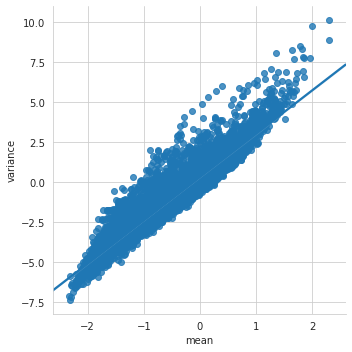

In [12]:
# this can take a while
sns.set_style("whitegrid")

sns.lmplot('mean','variance',var_df)

We will use the stats module loaded from scipy to calculate the linear regression line for this data. Take a look at the result. It is a list of values.

In [13]:
result = stats.linregress(var_df['mean'], var_df['variance'])
result

LinregressResult(slope=2.7043148710682656, intercept=0.3181160238528582, rvalue=0.9423692960470782, pvalue=0.0, stderr=0.008775336475066675)

To grab the values we are interested in (slope and y intercept), select the values out of the list. The slope is stored in the first value (position 0) and yintercept is the second value (position 1). Print the values you found to make sure they match the result you see above. 

In [14]:
slope = result[0]
yint = result[1]
print(slope)
print(yint)

2.7043148710682656
0.3181160238528582


To determine which genes have a variation that is greater than we would expect, we first need to calculate what we expect for each gene. Back to simple algebra: y=mx+b

In [15]:
var_df['expected'] = var_df['mean']*slope + yint
var_df.head()

,variance,mean,expected
Gene,,,
A1BG,-2.228102,-1.178714,-2.869498
A4GALT,-2.833982,-0.986291,-2.349126
AAAS,-1.160969,-0.350174,-0.628865
AACS,-2.452054,-0.871399,-2.038422
AADACL2-AS1,-4.708378,-1.790948,-4.525170


Let's grab genes with a variance >0.25 more than the expected value and plot these with a different color. We will create another column in the dataframe with a True/False result if the gene passes our criteria

In [16]:
var_df['sig'] = (var_df['variance'] - var_df['expected']) > 0.25
var_df.head()

,variance,mean,expected,sig
Gene,,,,
A1BG,-2.228102,-1.178714,-2.869498,True
A4GALT,-2.833982,-0.986291,-2.349126,False
AAAS,-1.160969,-0.350174,-0.628865,False
AACS,-2.452054,-0.871399,-2.038422,False
AADACL2-AS1,-4.708378,-1.790948,-4.525170,False


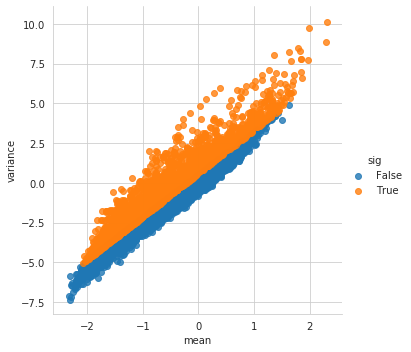

In [17]:
sns.lmplot('mean','variance',var_df, hue='sig', fit_reg=False)

Let's get a list of variable genes so we can subset the dataframe for only those genes. 

First, we will ask the question: which rows have a value in the column 'sig' == True:

In [18]:
(var_df['sig'] == True).head()

Gene
A1BG            True
A4GALT         False
AAAS           False
AACS           False
AADACL2-AS1    False
Name: sig, dtype: bool

Look familiar? We have a boolean of True/False with gene names (dataframe index). Subset the counts dataframe with .loc

In [19]:
variable_scaled_counts = scaled_counts.loc[var_df['sig'] == True]
print(variable_scaled_counts.shape)
variable_scaled_counts.head()

(2933, 952)


,HE24W_EVT_sc1,HE24W_EVT_sc10,HE24W_EVT_sc100,HE24W_EVT_sc101,HE24W_EVT_sc102,HE24W_EVT_sc103,HE24W_EVT_sc104,HE24W_EVT_sc105,HE24W_EVT_sc106,HE24W_EVT_sc107,...,HE8W_STB_sc59,HE8W_STB_sc6,HE8W_STB_sc60,HE8W_STB_sc61,HE8W_STB_sc62,HE8W_STB_sc63,HE8W_STB_sc64,HE8W_STB_sc7,HE8W_STB_sc8,HE8W_STB_sc9
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.013629,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.038242,...,0.0,0.000000,0.000000,0.012844,0.0,0.000000,0.015099,0.000000,0.000000,0.018301
ABAT,0.000000,0.014833,0.0,0.0,0.000000,0.000000,0.081038,0.0,0.0,0.000000,...,0.0,0.000000,0.014436,0.230697,0.0,0.000000,0.000000,0.000000,0.034462,0.103474
ABCB1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,1.168017,0.244607,0.025588,0.0,0.309423,0.015099,0.311793,0.534219,1.502732
ABCC3,0.000000,0.000000,0.0,0.0,0.000000,0.008717,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ABCG1,0.531126,0.505308,0.0,0.0,0.047476,0.140076,0.000000,0.0,0.0,0.063670,...,0.0,0.000000,0.000000,0.051277,0.0,0.038703,0.015099,0.000000,0.086206,0.000000


**Convert scaled counts into z-scores**

Lastly, we will calculate the zscore of each gene across the rows to use as input for clustering and dimensionality reduction. 

In [20]:
stats.zscore(variable_scaled_counts, axis=1)

array([[-0.18990633, -0.23907788, -0.23907788, ..., -0.23907788,
        -0.23907788, -0.17304811],
       [-0.15659006,  0.01408461, -0.15659006, ..., -0.15659006,
         0.23996228,  1.03406005],
       [-0.25581878, -0.25581878, -0.25581878, ...,  0.75904083,
         1.48301452,  4.63543876],
       ...,
       [-0.23806751, -0.28101939, -0.3322928 , ...,  0.09862516,
         0.20396893, -0.12198893],
       [-0.42393367, -0.46088793, -0.32837418, ..., -0.30848309,
        -0.31287122, -0.01519979],
       [-0.08037777, -0.08037777, -0.08037777, ..., -0.08037777,
        -0.08037777, -0.04806982]])

The output of this is an array, so let's put this back into a dataframe with the appropriate row and column labels

In [21]:
zscore_array = stats.zscore(variable_scaled_counts, axis=1)

zscore_variable_genes = pd.DataFrame(zscore_array, index = variable_scaled_counts.index)
zscore_variable_genes.columns = variable_scaled_counts.columns
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(2933, 952)


,HE24W_EVT_sc1,HE24W_EVT_sc10,HE24W_EVT_sc100,HE24W_EVT_sc101,HE24W_EVT_sc102,HE24W_EVT_sc103,HE24W_EVT_sc104,HE24W_EVT_sc105,HE24W_EVT_sc106,HE24W_EVT_sc107,...,HE8W_STB_sc59,HE8W_STB_sc6,HE8W_STB_sc60,HE8W_STB_sc61,HE8W_STB_sc62,HE8W_STB_sc63,HE8W_STB_sc64,HE8W_STB_sc7,HE8W_STB_sc8,HE8W_STB_sc9
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.189906,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.101105,...,-0.239078,-0.239078,-0.239078,-0.192737,-0.239078,-0.239078,-0.184601,-0.239078,-0.239078,-0.173048
ABAT,-0.156590,0.014085,-0.156590,-0.156590,-0.156590,-0.156590,0.775894,-0.156590,-0.156590,-0.156590,...,-0.156590,-0.156590,0.009520,2.497995,-0.156590,-0.156590,-0.156590,-0.156590,0.239962,1.034060
ABCB1,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,...,-0.255819,3.545972,0.540356,-0.172531,-0.255819,0.751324,-0.206671,0.759041,1.483015,4.635439
ABCC3,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.068383,-0.085088,-0.085088,-0.085088,-0.085088,...,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088
ABCG1,1.885803,1.780731,-0.275759,-0.275759,-0.082545,0.294318,-0.275759,-0.275759,-0.275759,-0.016638,...,-0.275759,-0.275759,-0.275759,-0.067073,-0.275759,-0.118247,-0.214308,-0.275759,0.075081,-0.275759


**Save this dataframe**

In [22]:
save_dir = "/home/rmorey/Desktop/biom262_SingleCell/results/"

zscore_variable_genes.to_csv(save_dir+"zscore_variable_genes.csv")